<a href="https://colab.research.google.com/github/vsvale/Building-Machine-Learning-Models-in-Spark-2/blob/main/Building_Machine_Learning_Models_in_Spark_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install pyspark
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [ ]:
from pyspark.ml.feature import VectorAssembler,StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder

In [ ]:
! git clone 'https://github.com/vsvale/Building-Machine-Learning-Models-in-Spark-2.git'

Cloning into 'Building-Machine-Learning-Models-in-Spark-2'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.


# Wine

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. <br>
Fonte: http://archive.ics.uci.edu/ml/datasets/Wine <br>
Forina, M. et al, PARVUS -
An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.

In [ ]:
wine_df = spark.read.csv('/content/Building-Machine-Learning-Models-in-Spark-2/datasets/wine.data',header=False,inferSchema=True)

In [ ]:
wine_df = wine_df\
.withColumnRenamed('_c1','Alcohol')\
.withColumnRenamed('_c2','Malic_acid')\
.withColumnRenamed('_c3','Ash')\
.withColumnRenamed('_c4','Alcalinity_of_ash')\
.withColumnRenamed('_c5','Magnesium')\
.withColumnRenamed('_c6','Total_phenols')\
.withColumnRenamed('_c7','Flavanoids')\
.withColumnRenamed('_c8','Nonflavanoid_phenols')\
.withColumnRenamed('_c9','Proanthocyanins')\
.withColumnRenamed('_c10','Color_intensity')\
.withColumnRenamed('_c11','Hue')\
.withColumnRenamed('_c12','OD280_OD315')\
.withColumnRenamed('_c13','Proline')\
.withColumnRenamed('_c0','cultivars')

In [ ]:
wine_df.printSchema()

root
 |-- cultivars: integer (nullable = true)
 |-- Alcohol: double (nullable = true)
 |-- Malic_acid: double (nullable = true)
 |-- Ash: double (nullable = true)
 |-- Alcalinity_of_ash: double (nullable = true)
 |-- Magnesium: integer (nullable = true)
 |-- Total_phenols: double (nullable = true)
 |-- Flavanoids: double (nullable = true)
 |-- Nonflavanoid_phenols: double (nullable = true)
 |-- Proanthocyanins: double (nullable = true)
 |-- Color_intensity: double (nullable = true)
 |-- Hue: double (nullable = true)
 |-- OD280_OD315: double (nullable = true)
 |-- Proline: integer (nullable = true)



In [ ]:
wine_df.show()

+---------+-------+----------+----+-----------------+---------+-------------+----------+--------------------+---------------+---------------+----+-----------+-------+
|cultivars|Alcohol|Malic_acid| Ash|Alcalinity_of_ash|Magnesium|Total_phenols|Flavanoids|Nonflavanoid_phenols|Proanthocyanins|Color_intensity| Hue|OD280_OD315|Proline|
+---------+-------+----------+----+-----------------+---------+-------------+----------+--------------------+---------------+---------------+----+-----------+-------+
|        1|  14.23|      1.71|2.43|             15.6|      127|          2.8|      3.06|                0.28|           2.29|           5.64|1.04|       3.92|   1065|
|        1|   13.2|      1.78|2.14|             11.2|      100|         2.65|      2.76|                0.26|           1.28|           4.38|1.05|        3.4|   1050|
|        1|  13.16|      2.36|2.67|             18.6|      101|          2.8|      3.24|                 0.3|           2.81|           5.68|1.03|       3.17|   1185

In [ ]:
wine_df.columns[1:]

['Alcohol',
 'Malic_acid',
 'Ash',
 'Alcalinity_of_ash',
 'Magnesium',
 'Total_phenols',
 'Flavanoids',
 'Nonflavanoid_phenols',
 'Proanthocyanins',
 'Color_intensity',
 'Hue',
 'OD280_OD315',
 'Proline']

In [ ]:
featureIndexer = VectorAssembler(inputCols=wine_df.columns[1:],outputCol="features")

In [ ]:
labelIndexer = StringIndexer(inputCol="cultivars",outputCol="label").fit(wine_df)

In [ ]:
(trainingData, testData) = wine_df.randomSplit([0.8, 0.2])

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(labelCol="label",featuresCol="features",maxBins=32,maxDepth=3,impurity='gini')

In [ ]:
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])

In [ ]:
model = pipeline.fit(trainingData)

In [ ]:
predictions = model.transform(testData)
predictions.select("prediction","label","features").show()

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       1.0|  1.0|[12.85,1.6,2.52,1...|
|       1.0|  1.0|[13.2,1.78,2.14,1...|
|       1.0|  1.0|[13.39,1.77,2.62,...|
|       1.0|  1.0|[13.48,1.81,2.41,...|
|       1.0|  1.0|[13.63,1.81,2.7,1...|
|       1.0|  1.0|[13.74,1.67,2.25,...|
|       1.0|  1.0|[13.76,1.53,2.7,1...|
|       1.0|  1.0|[13.82,1.75,2.42,...|
|       1.0|  1.0|[13.83,1.65,2.6,1...|
|       1.0|  1.0|[13.94,1.73,2.27,...|
|       1.0|  1.0|[14.1,2.02,2.4,18...|
|       1.0|  1.0|[14.1,2.16,2.3,18...|
|       1.0|  1.0|[14.3,1.92,2.72,2...|
|       0.0|  0.0|[11.41,0.74,2.5,2...|
|       0.0|  0.0|[11.62,1.99,2.28,...|
|       0.0|  0.0|[11.76,2.68,2.92,...|
|       0.0|  0.0|[11.87,4.31,2.39,...|
|       0.0|  0.0|[12.0,1.51,2.42,2...|
|       0.0|  0.0|[12.0,3.43,2.0,19...|
|       0.0|  0.0|[12.07,2.16,2.17,...|
+----------+-----+--------------------+
only showing top 20 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
fmeasure = evaluator.evaluate(predictions)
print("f1:",fmeasure)

f1: 0.8759898637947419


In [ ]:
y_pred = predictions.select(["prediction"]).collect()
y_test = predictions.select(["label"]).collect()

              precision    recall  f1-score   support

         0.0       0.93      0.78      0.85        18
         1.0       0.87      1.00      0.93        13
         2.0       0.82      0.90      0.86        10

    accuracy                           0.88        41
   macro avg       0.87      0.89      0.88        41
weighted avg       0.88      0.88      0.88        41



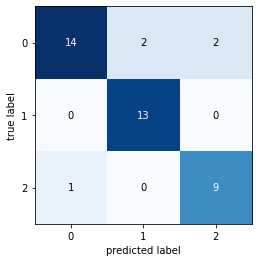

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

Decision Tree é comum dar Overfitting

# Adult

Prediction task is to determine whether a person makes over 50K a year. Fonte: https://archive.ics.uci.edu/ml/datasets/adult

In [ ]:
adult_df = spark.read.csv('/content/Building-Machine-Learning-Models-in-Spark-2/datasets/adult.csv',header=False,inferSchema=True,ignoreLeadingWhiteSpace=True)

In [ ]:
adult_df = adult_df\
.withColumnRenamed('_c0','age')\
.withColumnRenamed('_c1','workclass')\
.withColumnRenamed('_c2','fnlwgt')\
.withColumnRenamed('_c3','education')\
.withColumnRenamed('_c4','education-num')\
.withColumnRenamed('_c5','marital-status')\
.withColumnRenamed('_c6','occupation')\
.withColumnRenamed('_c7','relationship')\
.withColumnRenamed('_c8','race')\
.withColumnRenamed('_c9','sex')\
.withColumnRenamed('_c10','capital-gain')\
.withColumnRenamed('_c11','capital-loss')\
.withColumnRenamed('_c12','hours-per-week')\
.withColumnRenamed('_c13','native-country')\
.withColumnRenamed('_c14','label')\

In [ ]:
adult_df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- education-num: integer (nullable = true)
 |-- marital-status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- capital-gain: integer (nullable = true)
 |-- capital-loss: integer (nullable = true)
 |-- hours-per-week: integer (nullable = true)
 |-- native-country: string (nullable = true)
 |-- label: string (nullable = true)



In [ ]:
adult_df.show()

+---+----------------+------+------------+-------------+--------------------+-----------------+-------------+------------------+------+------------+------------+--------------+--------------+-----+
|age|       workclass|fnlwgt|   education|education-num|      marital-status|       occupation| relationship|              race|   sex|capital-gain|capital-loss|hours-per-week|native-country|label|
+---+----------------+------+------------+-------------+--------------------+-----------------+-------------+------------------+------+------------+------------+--------------+--------------+-----+
| 39|       State-gov| 77516|   Bachelors|           13|       Never-married|     Adm-clerical|Not-in-family|             White|  Male|        2174|           0|            40| United-States|<=50K|
| 50|Self-emp-not-inc| 83311|   Bachelors|           13|  Married-civ-spouse|  Exec-managerial|      Husband|             White|  Male|           0|           0|            13| United-States|<=50K|
| 38|     

In [ ]:
adult_df = adult_df.drop('fnlwgt')

In [ ]:
adult_df.count()

32561

In [ ]:
adult_df = adult_df.replace('?',None)

In [ ]:
adult_df = adult_df.dropna(how='any')

In [ ]:
adult_df.count()

30162

In [ ]:
(trainingData,testData) = adult_df.randomSplit([0.8,0.2])

In [ ]:
categoricalFeatures = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']

In [ ]:
indexers = [StringIndexer(inputCol=column,outputCol=column + '_idx',handleInvalid='keep') for column in categoricalFeatures]

In [ ]:
encoders = [OneHotEncoder(inputCol=column+'_idx',outputCol=column+'_enc') for column in categoricalFeatures]

In [ ]:
labelIndexer = [StringIndexer(inputCol='label',outputCol='label_idx')]

In [ ]:
requiredFeatures = [colunm + '_enc' for colunm in categoricalFeatures]

In [ ]:
featureIndexer = VectorAssembler(inputCols=requiredFeatures,outputCol="features") 

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(labelCol='label_idx', featuresCol='features', maxDepth=10)

In [ ]:
pipeline = Pipeline(stages=indexers + encoders + labelIndexer + [featureIndexer,rf])

In [ ]:
model = pipeline.fit(trainingData)

In [ ]:
predictions = model.transform(testData)

In [ ]:
predictions.select("prediction","label_idx","features").show()

+----------+---------+--------------------+
|prediction|label_idx|            features|
+----------+---------+--------------------+
|       0.0|      0.0|(98,[2,12,24,31,4...|
|       0.0|      0.0|(98,[2,12,24,41,4...|
|       0.0|      0.0|(98,[2,17,24,35,4...|
|       0.0|      0.0|(98,[0,14,24,33,4...|
|       0.0|      0.0|(98,[0,14,24,38,4...|
|       0.0|      0.0|(98,[0,14,24,38,4...|
|       0.0|      0.0|(98,[0,14,24,35,4...|
|       0.0|      0.0|(98,[0,14,24,35,4...|
|       0.0|      0.0|(98,[0,14,24,35,4...|
|       0.0|      0.0|(98,[0,14,24,35,4...|
|       0.0|      0.0|(98,[0,14,24,35,4...|
|       0.0|      0.0|(98,[0,14,24,35,4...|
|       0.0|      0.0|(98,[0,14,24,35,4...|
|       0.0|      0.0|(98,[0,14,24,35,4...|
|       0.0|      0.0|(98,[0,14,24,35,4...|
|       0.0|      0.0|(98,[0,14,24,35,4...|
|       0.0|      0.0|(98,[0,14,24,35,4...|
|       0.0|      0.0|(98,[0,14,24,35,4...|
|       0.0|      0.0|(98,[0,14,24,35,4...|
|       0.0|      0.0|(98,[0,14,

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="label_idx", predictionCol="prediction", metricName="f1")
fmeasure = evaluator.evaluate(predictions)
print("f1:",fmeasure)

f1: 0.8055673385183819


In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="label_idx", predictionCol="prediction", metricName="accuracy")
fmeasure = evaluator.evaluate(predictions)
print("accuracy:",fmeasure)

accuracy: 0.8194512896336454


In [ ]:
y_pred = predictions.select(["prediction"]).collect()
y_test = predictions.select(["label_idx"]).collect()

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      4555
         1.0       0.72      0.47      0.57      1532

    accuracy                           0.82      6087
   macro avg       0.78      0.70      0.73      6087
weighted avg       0.81      0.82      0.81      6087



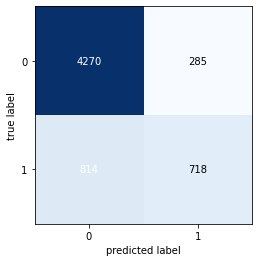

In [ ]:
print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

# Automobile

Predicting the price of an automobile given a set of features

In [ ]:
auto_df = spark.read.csv('/content/Building-Machine-Learning-Models-in-Spark-2/datasets/imports-85.data',header=True,inferSchema=True)

In [ ]:
auto_df.show()

+---------+-----------------+-----------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|symboling|normalized-losses|       make|fuel-type|aspiration|num-of-doors| body-style|drive-wheels|engine-location|wheel-base|length|width|height|curb-weight|engine-type|num-of-cylinders|engine-size|fuel-system|bore|stroke|compression-ratio|horsepower|peak-rpm|city-mpg|highway-mpg|price|
+---------+-----------------+-----------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|        3|                ?|alfa-romero|      gas|       std|         two|convertible|         rwd|          front|      88.6| 16

In [ ]:
auto_df.printSchema()

root
 |-- symboling: integer (nullable = true)
 |-- normalized-losses: string (nullable = true)
 |-- make: string (nullable = true)
 |-- fuel-type: string (nullable = true)
 |-- aspiration: string (nullable = true)
 |-- num-of-doors: string (nullable = true)
 |-- body-style: string (nullable = true)
 |-- drive-wheels: string (nullable = true)
 |-- engine-location: string (nullable = true)
 |-- wheel-base: double (nullable = true)
 |-- length: double (nullable = true)
 |-- width: double (nullable = true)
 |-- height: double (nullable = true)
 |-- curb-weight: integer (nullable = true)
 |-- engine-type: string (nullable = true)
 |-- num-of-cylinders: string (nullable = true)
 |-- engine-size: integer (nullable = true)
 |-- fuel-system: string (nullable = true)
 |-- bore: string (nullable = true)
 |-- stroke: string (nullable = true)
 |-- compression-ratio: double (nullable = true)
 |-- horsepower: string (nullable = true)
 |-- peak-rpm: string (nullable = true)
 |-- city-mpg: integer (nu

In [ ]:
auto_df = auto_df.replace('?',None)

In [ ]:
auto_df = auto_df.dropna(how='any')

In [ ]:
from pyspark.sql.functions import col

In [ ]:
auto_df = auto_df.select(
    col('price').cast('float'),
    col('make'),
    col('num-of-doors'),
    col('body-style'),
    col('drive-wheels'),
    col('wheel-base').cast('float'),
    col('curb-weight').cast('float'),
    col('num-of-cylinders'),
    col('engine-size').cast('float'),
    col('horsepower').cast('float'),
    col('peak-rpm').cast('float'),
)

In [ ]:
auto_df.show()

+-------+---------+------------+----------+------------+----------+-----------+----------------+-----------+----------+--------+
|  price|     make|num-of-doors|body-style|drive-wheels|wheel-base|curb-weight|num-of-cylinders|engine-size|horsepower|peak-rpm|
+-------+---------+------------+----------+------------+----------+-----------+----------------+-----------+----------+--------+
|13950.0|     audi|        four|     sedan|         fwd|      99.8|     2337.0|            four|      109.0|     102.0|  5500.0|
|17450.0|     audi|        four|     sedan|         4wd|      99.4|     2824.0|            five|      136.0|     115.0|  5500.0|
|17710.0|     audi|        four|     sedan|         fwd|     105.8|     2844.0|            five|      136.0|     110.0|  5500.0|
|23875.0|     audi|        four|     sedan|         fwd|     105.8|     3086.0|            five|      131.0|     140.0|  5500.0|
|16430.0|      bmw|         two|     sedan|         rwd|     101.2|     2395.0|            four| 

In [ ]:
(trainingData,testData) = auto_df.randomSplit([0.8,0.2])

In [ ]:
categoricalFeatures = ['make','num-of-doors','body-style','drive-wheels','num-of-cylinders']

In [ ]:
indexers = [StringIndexer(inputCol=column,outputCol=column + '_idx',handleInvalid='keep') for column in categoricalFeatures]

In [ ]:
encoders = [OneHotEncoder(inputCol=column+'_idx',outputCol=column+'_enc') for column in categoricalFeatures]

In [ ]:
requiredFeatures = [colunm + '_enc' for colunm in categoricalFeatures] + ['wheel-base','curb-weight','engine-size','horsepower','peak-rpm']

In [ ]:
featureassembler = VectorAssembler(inputCols=requiredFeatures,outputCol="features") 

In [ ]:
from pyspark.ml.regression import LinearRegression

In [ ]:
lr = LinearRegression(maxIter=100,regParam=1.0,elasticNetParam=0.8,labelCol='price',featuresCol='features')

In [ ]:
pipeline = Pipeline(stages=indexers + encoders + [featureassembler,lr])

In [ ]:
model = pipeline.fit(trainingData)

In [ ]:
lrModel = model.stages[-1]

In [ ]:
print('R²:',lrModel.summary.r2)
print('RMSE:',lrModel.summary.rootMeanSquaredError)

R²: 0.9627906479562974
RMSE: 1065.163883112867


In [ ]:
lrModel.numFeatures

37

In [ ]:
lrModel.coefficients

DenseVector([-1425.3901, -45.1633, -1324.8966, 585.3758, 204.0503, 1332.7127, -1107.5322, -2499.564, -377.5968, -443.1408, -653.5717, 4625.8656, -149.6928, 6023.6348, 529.5522, 204.6782, 8286.3045, 197.2671, -197.2671, 107.6582, 292.2583, -2026.9998, -1148.6521, 5373.828, -1230.8348, 652.8637, -404.059, -1241.2519, 708.9039, 2500.0349, 5373.828, 124.6038, 122.3606, 6.8908, -47.2041, 30.1752, -0.8728])

In [ ]:
predictions = model.transform(testData)

In [ ]:
predictions.select("prediction","price","features").show()

+------------------+------+--------------------+
|        prediction| price|            features|
+------------------+------+--------------------+
| 6423.470719511455|6338.0|(37,[0,18,20,24,2...|
| 6257.687207471181|6649.0|(37,[1,18,19,24,2...|
| 5818.662970106021|6669.0|(37,[6,18,20,24,2...|
| 5173.030853483504|6855.0|(37,[3,18,20,24,2...|
| 6152.550175835035|6918.0|(37,[0,17,21,24,2...|
| 6874.106096683727|6938.0|(37,[0,17,19,24,2...|
| 6985.836643432098|7129.0|(37,[3,18,20,24,2...|
| 5872.300306368763|7295.0|(37,[3,17,21,24,2...|
|  5247.99329021045|7349.0|(37,[1,17,21,24,2...|
|  6684.03397330153|7609.0|(37,[9,17,19,24,2...|
| 7200.280540403948|7799.0|(37,[1,18,20,24,2...|
| 8080.250628895346|7957.0|(37,[9,18,20,24,2...|
| 7869.819721523994|7957.0|(37,[10,18,20,24,...|
|  8145.81586108673|7975.0|(37,[8,18,19,24,2...|
| 5337.574303262585|7999.0|(37,[1,17,21,24,2...|
| 8561.022608372468|8195.0|(37,[8,17,19,24,2...|
| 9248.612428892086|8238.0|(37,[0,18,20,25,2...|
|5694.9692970134365|

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
evaluator = RegressionEvaluator(labelCol='price',predictionCol='prediction',metricName='r2')
r2 = evaluator.evaluate(predictions)
print('Test R² score:', r2)

Test R² score: 0.869411394188588


In [ ]:
evaluator = RegressionEvaluator(labelCol='price',predictionCol='prediction',metricName='rmse')
rmse = evaluator.evaluate(predictions)
print('Test rmse score:', rmse)

Test rmse score: 2492.754311951457


In [ ]:
predict_df = predictions.select("prediction","price").toPandas()

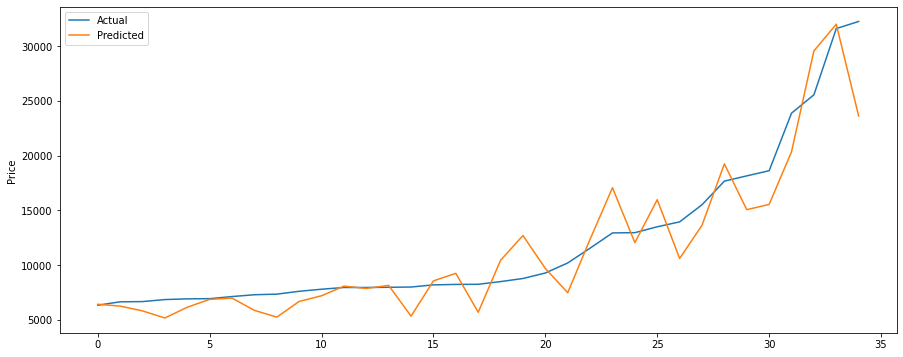

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(predict_df['price'],label='Actual')
plt.plot(predict_df['prediction'],label='Predicted')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder

In [ ]:
paramGrid = ParamGridBuilder().addGrid(
    lr.maxIter,[10,50,100]).addGrid(
    lr.regParam,[0.1,0.3,1.0]).addGrid(
    lr.elasticNetParam,[0.0,0.8,1.0]).build()

In [ ]:
evaluator = RegressionEvaluator(labelCol='price',predictionCol='prediction',metricName='rmse')

In [ ]:
from pyspark.ml.tuning import CrossValidator

In [ ]:
crossval = CrossValidator(estimator=pipeline,estimatorParamMaps=paramGrid,evaluator=evaluator,numFolds=3)

In [ ]:
model = crossval.fit(trainingData)

In [ ]:
blrmodel = model.bestModel.stages[-1]

In [ ]:
print('MaxIter', lrModel._java_obj.getMaxIter())
print('elasticNetParam',lrModel._java_obj.getElasticNetParam())
print('regParam',lrModel._java_obj.getRegParam())

MaxIter 100
elasticNetParam 0.8
regParam 1.0


In [ ]:
predictions = model.transform(testData)

In [ ]:
evaluator = RegressionEvaluator(labelCol='price',predictionCol='prediction',metricName='r2')
r2 = evaluator.evaluate(predictions)
print('Test R² score:', r2)

Test R² score: 0.8662310958047075


In [ ]:
evaluator = RegressionEvaluator(labelCol='price',predictionCol='prediction',metricName='rmse')
rmse = evaluator.evaluate(predictions)
print('Test rmse score:', rmse)

Test rmse score: 2522.9254530016588


# Titanic

In [ ]:
titanic_df = spark.read.csv('/content/Building-Machine-Learning-Models-in-Spark-2/datasets/titanic.csv',header=True,inferSchema=True)

In [ ]:
titanic_df.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [ ]:
titanic_df = titanic_df.drop('PassengerId','Name','SibSp','Ticket','Cabin')

In [ ]:
titanic_df = titanic_df.replace('?',None).dropna(how='any')

In [ ]:
titanic_df = StringIndexer(inputCol='Sex',outputCol='Gender',handleInvalid='keep').fit(titanic_df).transform(titanic_df)

In [ ]:
titanic_df = StringIndexer(inputCol='Embarked',outputCol='Boarded',handleInvalid='keep').fit(titanic_df).transform(titanic_df)

In [ ]:
titanic_df = titanic_df.drop('Sex','Embarked')

In [ ]:
assembler = VectorAssembler(inputCols=titanic_df.columns,outputCol='features')

In [ ]:
titanic_ready = assembler.transform(titanic_df)

In [ ]:
from pyspark.ml.clustering import KMeans

In [ ]:
kmeans = KMeans(k=8, seed=3)
model = kmeans.fit(titanic_ready)

In [ ]:
clusterdata = model.transform(titanic_ready)

In [ ]:
from pyspark.ml.evaluation import ClusteringEvaluator

In [ ]:
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(clusterdata)
print(silhouette)

0.6315918449619775


In [ ]:
centers = model.clusterCenters()
centers

[array([ 0.23913043,  2.17391304, 51.47282609,  0.11956522, 16.22165   ,
         0.20652174,  0.20652174]),
 array([ 0.26470588,  2.76143791, 25.29411765,  0.10457516,  9.62966928,
         0.27124183,  0.21895425]),
 array([1.00000000e+00, 1.00000000e+00, 3.53333333e+01, 3.33333333e-01,
        5.12329200e+02, 3.33333333e-01, 1.00000000e+00]),
 array([  0.73333333,   1.        ,  30.33333333,   1.33333333,
        239.99194   ,   0.73333333,   0.53333333]),
 array([  0.73333333,   1.        ,  32.43066667,   0.86666667,
        131.18388333,   0.63333333,   0.5       ]),
 array([ 0.68888889,  1.16666667, 36.03333333,  0.32222222, 69.30111333,
         0.48888889,  0.38888889]),
 array([ 0.54320988,  2.62962963,  7.17592593,  1.30864198, 27.04722099,
         0.49382716,  0.2345679 ]),
 array([ 0.45263158,  1.93684211, 34.43684211,  0.87368421, 28.13162211,
         0.44210526,  0.21052632])]

In [ ]:
clusterdata.show()

+--------+------+----+-----+-------+------+-------+--------------------+----------+
|Survived|Pclass| Age|Parch|   Fare|Gender|Boarded|            features|prediction|
+--------+------+----+-----+-------+------+-------+--------------------+----------+
|       0|     3|22.0|    0|   7.25|   0.0|    0.0|(7,[1,2,4],[3.0,2...|         1|
|       1|     1|38.0|    0|71.2833|   1.0|    1.0|[1.0,1.0,38.0,0.0...|         5|
|       1|     3|26.0|    0|  7.925|   1.0|    0.0|[1.0,3.0,26.0,0.0...|         1|
|       1|     1|35.0|    0|   53.1|   1.0|    0.0|[1.0,1.0,35.0,0.0...|         5|
|       0|     3|35.0|    0|   8.05|   0.0|    0.0|(7,[1,2,4],[3.0,3...|         1|
|       0|     1|54.0|    0|51.8625|   0.0|    0.0|(7,[1,2,4],[1.0,5...|         5|
|       0|     3| 2.0|    1| 21.075|   0.0|    0.0|[0.0,3.0,2.0,1.0,...|         6|
|       1|     3|27.0|    2|11.1333|   1.0|    0.0|[1.0,3.0,27.0,2.0...|         1|
|       1|     2|14.0|    0|30.0708|   1.0|    1.0|[1.0,2.0,14.0,0.0...|    

In [ ]:
from pyspark.sql.functions import avg,count

In [ ]:
titanic_df.select(
    avg('Survived'),avg('Pclass'),avg('Age'),avg('Fare'),avg('Gender'),avg('Boarded')
).show()

+------------------+-----------------+-----------------+-----------------+------------------+------------------+
|     avg(Survived)|      avg(Pclass)|         avg(Age)|        avg(Fare)|       avg(Gender)|      avg(Boarded)|
+------------------+-----------------+-----------------+-----------------+------------------+------------------+
|0.4044943820224719|2.240168539325843|29.64209269662921|34.56725140449432|0.3637640449438202|0.2612359550561798|
+------------------+-----------------+-----------------+-----------------+------------------+------------------+



In [ ]:
clusterdata.groupBy('prediction').agg(avg('Survived'),avg('Pclass'),avg('Age'),avg('Fare'),avg('Gender'),avg('Boarded'),count('prediction')).orderBy('prediction').show()

+----------+-------------------+------------------+------------------+------------------+-------------------+-------------------+-----------------+
|prediction|      avg(Survived)|       avg(Pclass)|          avg(Age)|         avg(Fare)|        avg(Gender)|       avg(Boarded)|count(prediction)|
+----------+-------------------+------------------+------------------+------------------+-------------------+-------------------+-----------------+
|         0| 0.2391304347826087|2.1739130434782608| 51.47282608695652|          16.22165|0.20652173913043478|0.20652173913043478|               92|
|         1| 0.2647058823529412| 2.761437908496732|25.294117647058822| 9.629669281045755|0.27124183006535946|0.21895424836601307|              306|
|         2|                1.0|               1.0|35.333333333333336|          512.3292| 0.3333333333333333|                1.0|                3|
|         3| 0.7333333333333333|               1.0|30.333333333333332|239.99194000000003| 0.7333333333333333| 0.

In [ ]:
clusterdata.filter(clusterdata.prediction==1).show()

+--------+------+----+-----+-------+------+-------+--------------------+----------+
|Survived|Pclass| Age|Parch|   Fare|Gender|Boarded|            features|prediction|
+--------+------+----+-----+-------+------+-------+--------------------+----------+
|       0|     3|22.0|    0|   7.25|   0.0|    0.0|(7,[1,2,4],[3.0,2...|         1|
|       1|     3|26.0|    0|  7.925|   1.0|    0.0|[1.0,3.0,26.0,0.0...|         1|
|       0|     3|35.0|    0|   8.05|   0.0|    0.0|(7,[1,2,4],[3.0,3...|         1|
|       1|     3|27.0|    2|11.1333|   1.0|    0.0|[1.0,3.0,27.0,2.0...|         1|
|       0|     3|20.0|    0|   8.05|   0.0|    0.0|(7,[1,2,4],[3.0,2...|         1|
|       0|     3|14.0|    0| 7.8542|   1.0|    0.0|[0.0,3.0,14.0,0.0...|         1|
|       0|     3|31.0|    0|   18.0|   1.0|    0.0|[0.0,3.0,31.0,0.0...|         1|
|       1|     2|34.0|    0|   13.0|   0.0|    0.0|[1.0,2.0,34.0,0.0...|         1|
|       1|     3|15.0|    0| 8.0292|   1.0|    2.0|[1.0,3.0,15.0,0.0...|    

# Day

In [ ]:
day_df = spark.read.csv('/content/Building-Machine-Learning-Models-in-Spark-2/datasets/day.csv',header=True,inferSchema=True)

In [ ]:
day_df.printSchema()

root
 |-- instant: integer (nullable = true)
 |-- dteday: string (nullable = true)
 |-- season: integer (nullable = true)
 |-- yr: integer (nullable = true)
 |-- mnth: integer (nullable = true)
 |-- holiday: integer (nullable = true)
 |-- weekday: integer (nullable = true)
 |-- workingday: integer (nullable = true)
 |-- weathersit: integer (nullable = true)
 |-- temp: double (nullable = true)
 |-- atemp: double (nullable = true)
 |-- hum: double (nullable = true)
 |-- windspeed: double (nullable = true)
 |-- casual: integer (nullable = true)
 |-- registered: integer (nullable = true)
 |-- cnt: integer (nullable = true)



In [ ]:
day_df= day_df.drop('instant', 'dteday','casual','registered')

In [ ]:
day_df.show()

+------+---+----+-------+-------+----------+----------+--------+--------+--------+---------+----+
|season| yr|mnth|holiday|weekday|workingday|weathersit|    temp|   atemp|     hum|windspeed| cnt|
+------+---+----+-------+-------+----------+----------+--------+--------+--------+---------+----+
|     1|  0|   1|      0|      6|         0|         2|0.344167|0.363625|0.805833| 0.160446| 985|
|     1|  0|   1|      0|      0|         0|         2|0.363478|0.353739|0.696087| 0.248539| 801|
|     1|  0|   1|      0|      1|         1|         1|0.196364|0.189405|0.437273| 0.248309|1349|
|     1|  0|   1|      0|      2|         1|         1|     0.2|0.212122|0.590435| 0.160296|1562|
|     1|  0|   1|      0|      3|         1|         1|0.226957| 0.22927|0.436957|   0.1869|1600|
|     1|  0|   1|      0|      4|         1|         1|0.204348|0.233209|0.518261|0.0895652|1606|
|     1|  0|   1|      0|      5|         1|         2|0.196522|0.208839|0.498696| 0.168726|1510|
|     1|  0|   1|   

In [ ]:
import seaborn as sns

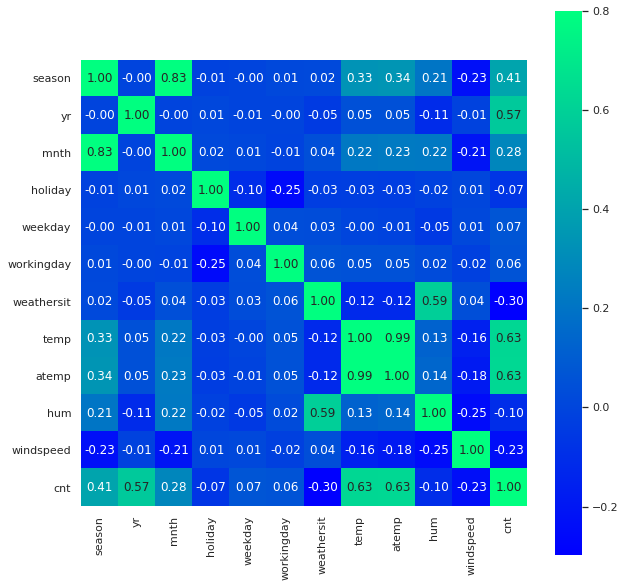

In [ ]:
corrmat = day_df.toPandas().corr()
plt.figure(figsize=(10,10))
sns.set(font_scale=1.0)
sns.heatmap(corrmat,vmax=.8,square=True,annot=True, fmt='.2f',cmap = 'winter')
plt.show()

In [ ]:
featureCols = day_df.columns.copy()

In [ ]:
featureCols.remove('cnt')

In [ ]:
featureCols

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed']

In [ ]:
assembler = VectorAssembler(inputCols=featureCols,outputCol='features')

In [ ]:
day_df_feat = assembler.transform(day_df)
day_df_feat.show()

+------+---+----+-------+-------+----------+----------+--------+--------+--------+---------+----+--------------------+
|season| yr|mnth|holiday|weekday|workingday|weathersit|    temp|   atemp|     hum|windspeed| cnt|            features|
+------+---+----+-------+-------+----------+----------+--------+--------+--------+---------+----+--------------------+
|     1|  0|   1|      0|      6|         0|         2|0.344167|0.363625|0.805833| 0.160446| 985|[1.0,0.0,1.0,0.0,...|
|     1|  0|   1|      0|      0|         0|         2|0.363478|0.353739|0.696087| 0.248539| 801|[1.0,0.0,1.0,0.0,...|
|     1|  0|   1|      0|      1|         1|         1|0.196364|0.189405|0.437273| 0.248309|1349|[1.0,0.0,1.0,0.0,...|
|     1|  0|   1|      0|      2|         1|         1|     0.2|0.212122|0.590435| 0.160296|1562|[1.0,0.0,1.0,0.0,...|
|     1|  0|   1|      0|      3|         1|         1|0.226957| 0.22927|0.436957|   0.1869|1600|[1.0,0.0,1.0,0.0,...|
|     1|  0|   1|      0|      4|         1|    

In [ ]:
(trainingData,testData) = day_df_feat.randomSplit([0.8,0.2])

In [ ]:
lr = LinearRegression(maxIter=100,regParam=1.0,elasticNetParam=0.8,labelCol='cnt',featuresCol='features')

In [ ]:
model = lr.fit(trainingData)

In [ ]:
predictions = model.transform(testData)

In [ ]:
evaluator = RegressionEvaluator(labelCol='cnt',predictionCol='prediction',metricName='r2')
r2 = evaluator.evaluate(predictions)
print('Test R² score:', r2)

Test R² score: 0.7800374885111547


In [ ]:
evaluator = RegressionEvaluator(labelCol='cnt',predictionCol='prediction',metricName='rmse')
rmse = evaluator.evaluate(predictions)
print('Test rmse score:', rmse)

Test rmse score: 846.46413250088


In [ ]:
predict_df = predictions.select("cnt","prediction").toPandas()

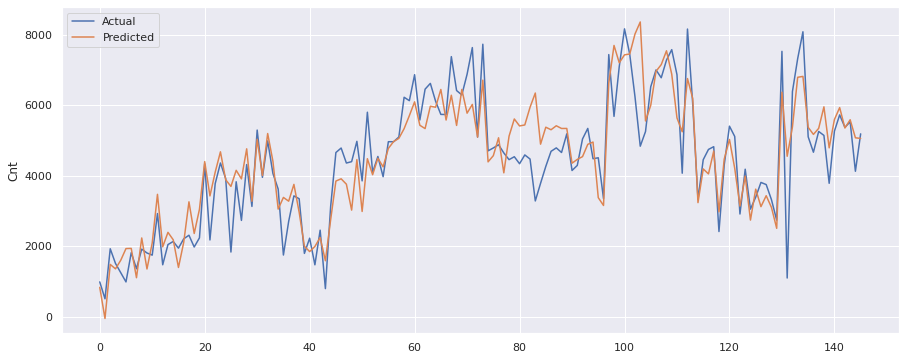

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(predict_df['cnt'],label='Actual')
plt.plot(predict_df['prediction'],label='Predicted')
plt.ylabel('Cnt')
plt.legend()
plt.show()

In [ ]:
from pyspark.ml.feature import PCA

In [ ]:
pca = PCA(k=8,inputCol='features',outputCol='pcaFeatures')

In [ ]:
pcatranform = pca.fit(day_df_feat)

In [ ]:
pcatranform.explainedVariance

DenseVector([0.7093, 0.2227, 0.0201, 0.0171, 0.0137, 0.0119, 0.0028, 0.0014])

In [ ]:
pcafeature = pcatranform.transform(day_df_feat).select('pcaFeatures')
pcafeature.show()

+--------------------+
|         pcaFeatures|
+--------------------+
|[-1.2994341055128...|
|[-1.2560740466291...|
|[-1.2498374390477...|
|[-1.2589193779944...|
|[-1.2649515947305...|
|[-1.2729147964420...|
|[-1.2856192710391...|
|[-1.2921840792479...|
|[-1.2413300547201...|
|[-1.2493942400509...|
|[-1.2659441069314...|
|[-1.2644614872243...|
|[-1.2701427734999...|
|[-1.2789252699700...|
|[-1.2941105474080...|
|[-1.2449798149026...|
|[-1.2585149268013...|
|[-1.2684139693571...|
|[-1.2757020639233...|
|[-1.2801173209444...|
+--------------------+
only showing top 20 rows



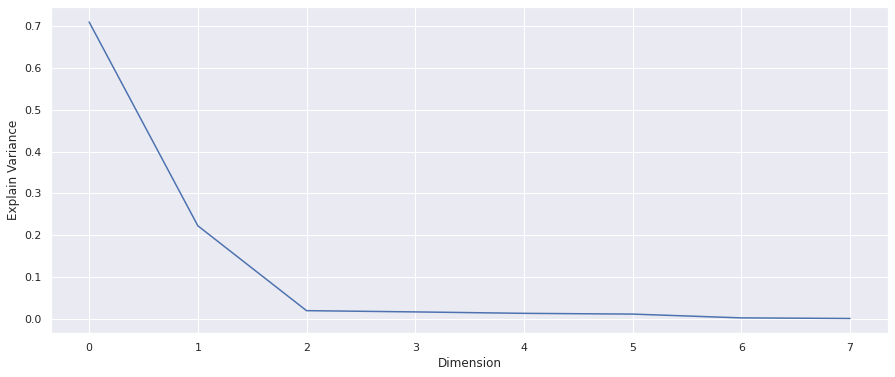

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(pcatranform.explainedVariance)
plt.xlabel('Dimension')
plt.ylabel('Explain Variance')
plt.show()

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id

In [ ]:
pcafeature = pcafeature.withColumn('row_index',monotonically_increasing_id())
day_df_feat = day_df_feat.withColumn('row_index',monotonically_increasing_id())

In [ ]:
transformedData = pcafeature.join(day_df_feat,on=['row_index']).sort('row_index').select('cnt','pcaFeatures')
transformedData.show()

+----+--------------------+
| cnt|         pcaFeatures|
+----+--------------------+
| 985|[-1.2994341055128...|
| 801|[-1.2560740466291...|
|1349|[-1.2498374390477...|
|1562|[-1.2589193779944...|
|1600|[-1.2649515947305...|
|1606|[-1.2729147964420...|
|1510|[-1.2856192710391...|
| 959|[-1.2921840792479...|
| 822|[-1.2413300547201...|
|1321|[-1.2493942400509...|
|1263|[-1.2659441069314...|
|1162|[-1.2644614872243...|
|1406|[-1.2701427734999...|
|1421|[-1.2789252699700...|
|1248|[-1.2941105474080...|
|1204|[-1.2449798149026...|
|1000|[-1.2585149268013...|
| 683|[-1.2684139693571...|
|1650|[-1.2757020639233...|
|1927|[-1.2801173209444...|
+----+--------------------+
only showing top 20 rows



In [ ]:
(pcatrainingData,pcatestData) = transformedData.randomSplit([0.8,0.2])

In [ ]:
pcalr = LinearRegression(maxIter=100,regParam=1.0,elasticNetParam=0.8,labelCol='cnt',featuresCol='pcaFeatures')

In [ ]:
model = pcalr.fit(pcatrainingData)

In [ ]:
predictions = model.transform(pcatestData)

In [ ]:
evaluator = RegressionEvaluator(labelCol='cnt',predictionCol='prediction',metricName='r2')
r2 = evaluator.evaluate(predictions)
print('Test R² score:', r2)

Test R² score: 0.7983592053762659


In [ ]:
evaluator = RegressionEvaluator(labelCol='cnt',predictionCol='prediction',metricName='rmse')
rmse = evaluator.evaluate(predictions)
print('Test rmse score:', rmse)

Test rmse score: 845.7527384091036


# Movie

In [ ]:
ratings_df = spark.read.csv('/content/Building-Machine-Learning-Models-in-Spark-2/datasets/movielens/ratings.csv',header=True,inferSchema=True)

In [ ]:
ratings_df.show()

+------+-------+------+----------+
|userId|movieId|rating| timestamp|
+------+-------+------+----------+
|     1|     31|   2.5|1260759144|
|     1|   1029|   3.0|1260759179|
|     1|   1061|   3.0|1260759182|
|     1|   1129|   2.0|1260759185|
|     1|   1172|   4.0|1260759205|
|     1|   1263|   2.0|1260759151|
|     1|   1287|   2.0|1260759187|
|     1|   1293|   2.0|1260759148|
|     1|   1339|   3.5|1260759125|
|     1|   1343|   2.0|1260759131|
|     1|   1371|   2.5|1260759135|
|     1|   1405|   1.0|1260759203|
|     1|   1953|   4.0|1260759191|
|     1|   2105|   4.0|1260759139|
|     1|   2150|   3.0|1260759194|
|     1|   2193|   2.0|1260759198|
|     1|   2294|   2.0|1260759108|
|     1|   2455|   2.5|1260759113|
|     1|   2968|   1.0|1260759200|
|     1|   3671|   3.0|1260759117|
+------+-------+------+----------+
only showing top 20 rows



In [ ]:
ratings_df.printSchema()

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp: integer (nullable = true)



In [ ]:
ratings_df = ratings_df.drop('timestamp')

In [ ]:
ratings_df.select('rating').toPandas().describe()

,rating
count,100004.000000
mean,3.543608
std,1.058064
min,0.500000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


In [ ]:
(trainingData,testData) = ratings_df.randomSplit([0.8,0.2])

In [ ]:
from pyspark.ml.recommendation import ALS

In [ ]:
als = ALS(maxIter=5,regParam=0.1,userCol='userId',itemCol='movieId',ratingCol='rating',coldStartStrategy='drop')

In [ ]:
model = als.fit(trainingData)

In [ ]:
predictions = model.transform(testData)
predictions.show()

+------+-------+------+----------+
|userId|movieId|rating|prediction|
+------+-------+------+----------+
|   380|    463|   3.0| 3.1349494|
|   534|    463|   4.0| 3.7292118|
|    85|    471|   3.0|   2.61947|
|   460|    471|   5.0| 3.9239805|
|   440|    471|   3.0| 2.6203055|
|   306|    471|   3.0| 3.6576607|
|   309|    471|   4.0|  4.240414|
|   607|    471|   4.0| 3.1942403|
|    15|    471|   3.0| 2.5990868|
|   380|    471|   4.0| 3.7151892|
|    73|    471|   4.0| 3.8628638|
|   509|    496|   3.0| 2.3360374|
|   412|    833|   1.0| 2.5768213|
|    52|   1088|   4.0| 3.3771102|
|   500|   1088|   4.0| 3.5996304|
|    19|   1088|   3.0| 3.0785532|
|   607|   1088|   2.0| 3.1746027|
|    15|   1088|   2.0| 1.5534276|
|   262|   1088|   2.0| 1.7965276|
|   358|   1088|   3.0| 3.3416553|
+------+-------+------+----------+
only showing top 20 rows



In [ ]:
predictions.select('rating','prediction').toPandas().describe()

,rating,prediction
count,19244.000000,19244.000000
mean,3.561370,3.383104
std,1.054263,0.747603
min,0.500000,-0.180335
25%,3.000000,2.940883
50%,4.000000,3.466455
75%,4.000000,3.908389
max,5.000000,5.472767


In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
evaluator = RegressionEvaluator(metricName='rmse',labelCol='rating',predictionCol='prediction')
rmse = evaluator.evaluate(predictions)
rmse

0.9211295469810166

In [ ]:
userRecsAll = model.recommendForAllUsers(3)
userRecsAll.show()

+------+--------------------+
|userId|     recommendations|
+------+--------------------+
|   471|[{67504, 5.148106...|
|   463|[{67504, 5.146070...|
|   496|[{3414, 5.823874}...|
|   148|[{67504, 5.479235...|
|   540|[{59684, 5.766154...|
|   392|[{94466, 4.836390...|
|   243|[{67504, 5.268352...|
|   623|[{67504, 5.652256...|
|    31|[{67504, 5.336488...|
|   516|[{67504, 5.141999...|
|   580|[{67504, 4.724992...|
|   251|[{59684, 5.5433},...|
|   451|[{6101, 5.6839437...|
|    85|[{2106, 5.586305}...|
|   137|[{26258, 5.515092...|
|    65|[{67504, 6.100886...|
|   458|[{59684, 4.745740...|
|   481|[{67504, 6.102965...|
|    53|[{2071, 5.760992}...|
|   255|[{67504, 5.870124...|
+------+--------------------+
only showing top 20 rows



In [ ]:
movieRecsAll = model.recommendForAllItems(3)
movieRecsAll.show()

+-------+--------------------+
|movieId|     recommendations|
+-------+--------------------+
|   1580|[{145, 5.0294185}...|
|   5300|[{465, 5.0327845}...|
|   6620|[{71, 4.7176347},...|
|   7340|[{123, 4.460951},...|
|  54190|[{545, 4.194389},...|
|    471|[{401, 5.0946927}...|
|   1591|[{98, 4.016777}, ...|
|   1342|[{145, 4.5282493}...|
|   2122|[{351, 3.821097},...|
|   2142|[{543, 4.6782527}...|
|   7982|[{113, 4.9157104}...|
|  44022|[{46, 4.958559}, ...|
| 141422|[{113, 3.469968},...|
|    463|[{113, 4.992121},...|
|    833|[{296, 4.2681117}...|
|   5803|[{156, 2.7376513}...|
|   7833|[{113, 4.786275},...|
| 160563|[{145, 4.2436013}...|
|   3794|[{145, 5.243506},...|
|  40574|[{473, 3.4481316}...|
+-------+--------------------+
only showing top 20 rows



In [ ]:
from pyspark.sql.types import IntegerType

In [ ]:
userList = [148,463,267]
usersDF = spark.createDataFrame(userList,IntegerType()).toDF('userId')
usersDF.show()

+------+
|userId|
+------+
|   148|
|   463|
|   267|
+------+



In [ ]:
userRecs = model.recommendForUserSubset(usersDF,5)
userRecs.show()

+------+--------------------+
|userId|     recommendations|
+------+--------------------+
|   148|[{67504, 5.479235...|
|   463|[{83318, 5.146070...|
|   267|[{59684, 5.437618...|
+------+--------------------+



In [ ]:
userMovieList = userRecs.filter(userRecs.userId == 148).select('recommendations')
userMovieList.show()

+--------------------+
|     recommendations|
+--------------------+
|[{67504, 5.479235...|
+--------------------+



In [ ]:
movieList = userMovieList.collect()[0].recommendations
movieList

[Row(movieId=67504, rating=5.479235649108887),
 Row(movieId=83318, rating=5.479235649108887),
 Row(movieId=83411, rating=5.479235649108887),
 Row(movieId=83359, rating=5.479235649108887),
 Row(movieId=3414, rating=5.252651214599609)]

In [ ]:
moviesDF = spark.createDataFrame(movieList)
moviesDF.show()

+-------+-----------------+
|movieId|           rating|
+-------+-----------------+
|  67504|5.479235649108887|
|  83318|5.479235649108887|
|  83411|5.479235649108887|
|  83359|5.479235649108887|
|   3414|5.252651214599609|
+-------+-----------------+



In [ ]:
movie_df = spark.read.csv('/content/Building-Machine-Learning-Models-in-Spark-2/datasets/movielens/movies.csv',header=True,inferSchema=True)

In [ ]:
recommmendedMovies = movie_df.join(moviesDF, on=['movieID']).orderBy('rating',ascending=False).select('title','genres','rating')
recommmendedMovies.show()

+--------------------+-----------------+-----------------+
|               title|           genres|           rating|
+--------------------+-----------------+-----------------+
|Play House, The (...|           Comedy|5.479235649108887|
|         Cops (1922)|           Comedy|5.479235649108887|
|Land of Silence a...|      Documentary|5.479235649108887|
|    Goat, The (1921)|           Comedy|5.479235649108887|
|Love Is a Many-Sp...|Drama|Romance|War|5.252651214599609|
+--------------------+-----------------+-----------------+



In [ ]:
from pyspark.sql.types import IntegerType
def getRecommendationsForUser(userId,numRecs):
  usersDF = spark.createDataFrame([userId],IntegerType()).toDF('userId')
  userRecs = model.recommendForUserSubset(usersDF,numRecs)
  movieList = userMovieList.collect()[0].recommendations
  moviesDF = spark.createDataFrame(movieList)
  recommmendedMovies = movie_df.join(moviesDF, on=['movieID']).orderBy('rating',ascending=False).select('title','genres','rating')
  return recommmendedMovies


In [ ]:
getRecommendationsForUser(4,2).show()

+--------------------+-----------------+-----------------+
|               title|           genres|           rating|
+--------------------+-----------------+-----------------+
|Play House, The (...|           Comedy|5.479235649108887|
|         Cops (1922)|           Comedy|5.479235649108887|
|Land of Silence a...|      Documentary|5.479235649108887|
|    Goat, The (1921)|           Comedy|5.479235649108887|
|Love Is a Many-Sp...|Drama|Romance|War|5.252651214599609|
+--------------------+-----------------+-----------------+



# Bands

In [ ]:
userartist_df = spark.read.csv('/content/Building-Machine-Learning-Models-in-Spark-2/datasets/lastfm/user_artists.dat',header=True,sep='\t',inferSchema=True)

In [ ]:
userartist_df.show()

+------+--------+------+
|userID|artistID|weight|
+------+--------+------+
|     2|      51| 13883|
|     2|      52| 11690|
|     2|      53| 11351|
|     2|      54| 10300|
|     2|      55|  8983|
|     2|      56|  6152|
|     2|      57|  5955|
|     2|      58|  4616|
|     2|      59|  4337|
|     2|      60|  4147|
|     2|      61|  3923|
|     2|      62|  3782|
|     2|      63|  3735|
|     2|      64|  3644|
|     2|      65|  3579|
|     2|      66|  3312|
|     2|      67|  3301|
|     2|      68|  2927|
|     2|      69|  2720|
|     2|      70|  2686|
+------+--------+------+
only showing top 20 rows



In [ ]:
userartist_df.toPandas().describe()

,userID,artistID,weight
count,92834.000000,92834.000000,92834.00000
mean,1037.010481,3331.123145,745.24393
std,610.870436,4383.590502,3751.32208
min,2.000000,1.000000,1.00000
25%,502.000000,436.000000,107.00000
50%,1029.000000,1246.000000,260.00000
75%,1568.000000,4350.000000,614.00000
max,2100.000000,18745.000000,352698.00000


In [ ]:
from pyspark.sql.functions import stddev,mean,col

In [ ]:
df = userartist_df.select(mean('weight').alias('mean_weight'),
                          stddev('weight').alias('stddev_weight'))\
                          .crossJoin(userartist_df)\
                          .withColumn('weight_scaled',
                                      (col('weight')-col('mean_weight'))/col('stddev_weight'))

In [ ]:
df.show()

+-----------------+------------------+------+--------+------+------------------+
|      mean_weight|     stddev_weight|userID|artistID|weight|     weight_scaled|
+-----------------+------------------+------+--------+------+------------------+
|745.2439300256372|3751.3220803876798|     2|      51| 13883|3.5021669130091446|
|745.2439300256372|3751.3220803876798|     2|      52| 11690|2.9175730143766483|
|745.2439300256372|3751.3220803876798|     2|      53| 11351| 2.827204874095565|
|745.2439300256372|3751.3220803876798|     2|      54| 10300|2.5470369819556864|
|745.2439300256372|3751.3220803876798|     2|      55|  8983| 2.195960755553955|
|745.2439300256372|3751.3220803876798|     2|      56|  6152| 1.441293483767089|
|745.2439300256372|3751.3220803876798|     2|      57|  5955|1.3887786647836864|
|745.2439300256372|3751.3220803876798|     2|      58|  4616|1.0318378393076661|
|745.2439300256372|3751.3220803876798|     2|      59|  4337|0.9574640601382788|
|745.2439300256372|3751.3220

In [ ]:
from pyspark.ml.feature import StandardScaler

In [ ]:
vectdf = VectorAssembler(inputCols=["weight"],outputCol="features").transform(userartist_df)
vectdf.show()

+------+--------+------+---------+
|userID|artistID|weight| features|
+------+--------+------+---------+
|     2|      51| 13883|[13883.0]|
|     2|      52| 11690|[11690.0]|
|     2|      53| 11351|[11351.0]|
|     2|      54| 10300|[10300.0]|
|     2|      55|  8983| [8983.0]|
|     2|      56|  6152| [6152.0]|
|     2|      57|  5955| [5955.0]|
|     2|      58|  4616| [4616.0]|
|     2|      59|  4337| [4337.0]|
|     2|      60|  4147| [4147.0]|
|     2|      61|  3923| [3923.0]|
|     2|      62|  3782| [3782.0]|
|     2|      63|  3735| [3735.0]|
|     2|      64|  3644| [3644.0]|
|     2|      65|  3579| [3579.0]|
|     2|      66|  3312| [3312.0]|
|     2|      67|  3301| [3301.0]|
|     2|      68|  2927| [2927.0]|
|     2|      69|  2720| [2720.0]|
|     2|      70|  2686| [2686.0]|
+------+--------+------+---------+
only showing top 20 rows



In [ ]:
stand = StandardScaler(inputCol='features',outputCol='weight_scaled',withStd=True,withMean=True).fit(vectdf).transform(vectdf)
stand.show()

+------+--------+------+---------+--------------------+
|userID|artistID|weight| features|       weight_scaled|
+------+--------+------+---------+--------------------+
|     2|      51| 13883|[13883.0]|[3.5021669130091455]|
|     2|      52| 11690|[11690.0]| [2.917573014376649]|
|     2|      53| 11351|[11351.0]|[2.8272048740955658]|
|     2|      54| 10300|[10300.0]|[2.5470369819556873]|
|     2|      55|  8983| [8983.0]|[2.1959607555539553]|
|     2|      56|  6152| [6152.0]|[1.4412934837670894]|
|     2|      57|  5955| [5955.0]| [1.388778664783687]|
|     2|      58|  4616| [4616.0]|[1.0318378393076668]|
|     2|      59|  4337| [4337.0]|[0.9574640601382793]|
|     2|      60|  4147| [4147.0]|[0.9068152499512414]|
|     2|      61|  3923| [3923.0]|[0.8471029684675756]|
|     2|      62|  3782| [3782.0]|[0.8095162198550895]|
|     2|      63|  3735| [3735.0]|[0.7969873036509275]|
|     2|      64|  3644| [3644.0]|[0.7727291892981882]|
|     2|      65|  3579| [3579.0]|[0.75540196476

In [ ]:
(trainingData,testData) = df.randomSplit([0.8,0.2])

In [ ]:
als = ALS(maxIter=10,regParam=0.1,userCol='userID',itemCol='artistID',implicitPrefs=True,ratingCol='weight_scaled',coldStartStrategy='drop')

In [ ]:
model = als.fit(trainingData)

In [ ]:
predictions = model.transform(testData)
predictions.show()

+-----------------+------------------+------+--------+------+--------------------+-------------+
|      mean_weight|     stddev_weight|userID|artistID|weight|       weight_scaled|   prediction|
+-----------------+------------------+------+--------+------+--------------------+-------------+
|745.2439300256372|3751.3220803876798|     3|     148|    66| -0.1810678783292958|          0.0|
|745.2439300256372|3751.3220803876798|  1280|     463|   316|-0.11442470703056161|  0.012210684|
|745.2439300256372|3751.3220803876798|  1692|     463|  1018| 0.07270931797628395| -0.002507037|
|745.2439300256372|3751.3220803876798|  2027|     471|   163|-0.15521032786538694| -4.902607E-4|
|745.2439300256372|3751.3220803876798|   770|     471|   239|-0.13495080379057173|  9.927623E-4|
|745.2439300256372|3751.3220803876798|  1988|     471|    83|-0.17653614268098186|-8.3007297E-4|
|745.2439300256372|3751.3220803876798|   946|     471|  4061|  0.8838899990244763| 0.0078280205|
|745.2439300256372|3751.322080

In [ ]:
predictions.select('weight_scaled','prediction').toPandas().describe()

,weight_scaled,prediction
count,16117.000000,16117.000000
mean,0.007844,0.043739
std,0.825243,0.102941
min,-0.198395,-0.492079
25%,-0.168006,0.000000
50%,-0.125354,0.002585
75%,-0.026189,0.036015
max,45.784060,1.185532


In [ ]:
artistData = spark.read.csv('/content/Building-Machine-Learning-Models-in-Spark-2/datasets/lastfm/artists.dat',header=True,sep='\t',inferSchema=True)

In [ ]:
artistData.show()

+---+--------------------+--------------------+--------------------+
| id|                name|                 url|          pictureURL|
+---+--------------------+--------------------+--------------------+
|  1|        MALICE MIZER|http://www.last.f...|http://userserve-...|
|  2|     Diary of Dreams|http://www.last.f...|http://userserve-...|
|  3|   Carpathian Forest|http://www.last.f...|http://userserve-...|
|  4|        Moi dix Mois|http://www.last.f...|http://userserve-...|
|  5|         Bella Morte|http://www.last.f...|http://userserve-...|
|  6|           Moonspell|http://www.last.f...|http://userserve-...|
|  7|      Marilyn Manson|http://www.last.f...|http://userserve-...|
|  8|         DIR EN GREY|http://www.last.f...|http://userserve-...|
|  9|         Combichrist|http://www.last.f...|http://userserve-...|
| 10|             Grendel|http://www.last.f...|http://userserve-...|
| 11|            Agonoize|http://www.last.f...|http://userserve-...|
| 12|            Behemoth|http://w

In [ ]:
from pyspark.sql.types import IntegerType
def getRecommendationsForUser(userId,numRecs):
  usersDF = spark.createDataFrame([userId],IntegerType()).toDF('userId')
  userRecs = model.recommendForUserSubset(usersDF,numRecs)
  artistsList = userRecs.collect()[0].recommendations
  artistDF = spark.createDataFrame(artistsList)
  recommmendedArtistis = artistData.join(artistDF, artistData.id == artistDF.artistID).orderBy('rating',ascending=False).select('name','url','rating')
  return recommmendedArtistis

In [ ]:
getRecommendationsForUser(4,2).show()

+------------+--------------------+-------------------+
|        name|                 url|             rating|
+------------+--------------------+-------------------+
|Depeche Mode|http://www.last.f...|0.38291558623313904|
| The Beatles|http://www.last.f...|0.23952211439609528|
+------------+--------------------+-------------------+



In [ ]:
userArtistRaw = userartist_df.filter(userartist_df.userID == 4)

In [ ]:
userArtistInfo = artistData.join(userArtistRaw,artistData.id==userArtistRaw.artistID).orderBy('weight',ascending=False).select('name','weight')

In [ ]:
userArtistInfo.show()

+-------------------+------+
|               name|weight|
+-------------------+------+
|       Depeche Mode|  4983|
|        Deep Forest|  1807|
|     Porcupine Tree|  1208|
|          De/Vision|   903|
|          Radiohead|   826|
|    Robbie Williams|   777|
|               VAST|   743|
|    Michael Jackson|   732|
|          עברי לידר|   729|
|           The Cure|   724|
|           אביב גפן|   712|
|                Air|   686|
|   Enrique Iglesias|   632|
|God Is an Astronaut|   524|
|         Pink Floyd|   465|
|          יוני בלוך|   455|
|        Planet Funk|   446|
|    The Cranberries|   445|
|           Röyksopp|   420|
|    Scissor Sisters|   407|
+-------------------+------+
only showing top 20 rows

